# Question 8: Does weather have any effect on headway or on-time performance? To help answer this question, the file bna_2022.csv contains historical weather data recorded at Nashville International Airport.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
headway = pd.read_csv('../Data/Headway Data.csv')

In [3]:
weather = pd.read_csv('../Data/bna_weather.csv')

stripped hour from data column to merge the two datasets

In [4]:
headway['NEW_DATE']=headway.DATE
headway['NEW_DATE']= pd.to_datetime(headway.NEW_DATE)
headway['HOUR']=headway.SCHEDULED_TIME.str.slice(0,2).astype(str)

In [5]:
weather['HOUR']=weather.Date.str.slice(11,13).astype(str)
weather['NEW_DATE']=weather.Date.str.slice(0,10).astype(str)
weather['NEW_DATE']= pd.to_datetime(weather.NEW_DATE)

In [6]:
merge_df = headway.merge(weather, on=['NEW_DATE','HOUR'], how= "left")


In [7]:
merge_df = merge_df.drop_duplicates(['ADHERENCE_ID'])

In [8]:
merge_df['DEV_PERCENT'] = merge_df.HDWY_DEV/merge_df.SCHEDULED_HDWY * 100

In [9]:
df_drop = merge_df.dropna(subset=['DEV_PERCENT'])

In [13]:
def BUNCH_GAP(value):
    if value >= 50:
        return "Gapped"
    elif value <= -50:
        return "Bunched" 
    else:
        return "On Time"

df_drop['BUNCH_GAP'] = df_drop['DEV_PERCENT'].map(BUNCH_GAP)
df_drop.head()

C:\Users\Rebecca Wolfe\AppData\Local\Temp\ipykernel_11532\1767982470.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_drop['BUNCH_GAP'] = df_drop['DEV_PERCENT'].map(BUNCH_GAP)


,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,...,primary_wave_period,primary_wave_height,primary_swell_period,primary_swell_height,primary_swell_direction,secondary_swell_period,secondary_swell_height,secondary_swell_direction,DEV_PERCENT,BUNCH_GAP
0,120211101,1,76447164,2021-11-01,7,1704,2088,297750,0,TO DOWNTOWN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.166664,On Time
1,120211101,1,76447165,2021-11-01,7,1704,2088,297750,0,TO DOWNTOWN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.809521,On Time
12,120211101,1,76447976,2021-11-01,22,2200,1352,298128,0,TO DOWNTOWN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.047620,On Time
13,120211101,1,76447977,2021-11-01,22,2200,1352,298128,0,TO DOWNTOWN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.476189,On Time
14,120211101,1,76447978,2021-11-01,22,2200,1352,298128,0,TO DOWNTOWN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-6.777780,On Time


In [14]:
# totals after dropping null values from DEV_PERCENT column 

df_drop['BUNCH_GAP'].value_counts(dropna=False)

On Time    1350769
Gapped       86564
Bunched      70014
Name: BUNCH_GAP, dtype: int64

In [15]:
# percentages

df_drop['BUNCH_GAP'].value_counts(normalize=True)

On Time    0.896123
Gapped     0.057428
Bunched    0.046448
Name: BUNCH_GAP, dtype: float64

make a dataframe with just rain


In [19]:
raining = df_drop.loc[df_drop['precip_hrly'] >0]
raining.head()       

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,...,primary_wave_period,primary_wave_height,primary_swell_period,primary_swell_height,primary_swell_direction,secondary_swell_period,secondary_swell_height,secondary_swell_direction,DEV_PERCENT,BUNCH_GAP
58929,120211111,1,76887149,2021-11-11,22,2200,1194,298154,0,FROM DOWNTOWN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.466664,On Time
58932,120211111,1,76887150,2021-11-11,22,2200,1194,298154,0,FROM DOWNTOWN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-66.969700,Bunched
58938,120211111,1,76887152,2021-11-11,22,2200,1194,298133,0,TO DOWNTOWN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-7.666668,On Time
58941,120211111,1,76887153,2021-11-11,22,2200,1194,298133,0,TO DOWNTOWN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-45.666670,On Time
58947,120211111,1,76887155,2021-11-11,22,2200,1194,298159,0,FROM DOWNTOWN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,On Time


In [21]:
raining.loc[raining['temp'] >32, 'FREEZING_NOT_FREEZING']= 'Above Freezing'
raining.loc[raining['temp'] <=32, 'FREEZING_NOT_FREEZING']= 'At or Below Freezing'

C:\Users\Rebecca Wolfe\AppData\Local\Temp\ipykernel_11532\1387499982.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  raining.loc[raining['temp'] >32, 'FREEZING_NOT_FREEZING']= 'Above Freezing'


In [22]:
raining.head()

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,...,primary_wave_height,primary_swell_period,primary_swell_height,primary_swell_direction,secondary_swell_period,secondary_swell_height,secondary_swell_direction,DEV_PERCENT,BUNCH_GAP,FREEZING_NOT_FREEZING
58929,120211111,1,76887149,2021-11-11,22,2200,1194,298154,0,FROM DOWNTOWN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.466664,On Time,Above Freezing
58932,120211111,1,76887150,2021-11-11,22,2200,1194,298154,0,FROM DOWNTOWN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-66.969700,Bunched,Above Freezing
58938,120211111,1,76887152,2021-11-11,22,2200,1194,298133,0,TO DOWNTOWN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-7.666668,On Time,Above Freezing
58941,120211111,1,76887153,2021-11-11,22,2200,1194,298133,0,TO DOWNTOWN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-45.666670,On Time,Above Freezing
58947,120211111,1,76887155,2021-11-11,22,2200,1194,298159,0,FROM DOWNTOWN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,On Time,Above Freezing


In [39]:
sns.barplot(x='ADHERENCE_ID', y='FREEZING_NOT_FREEZING', hue='BUNCH_GAP', data=raining) 
sns.barplot(x='Day', y='Customers', hue='Time', data=df) 

NameError: name 'rain' is not defined

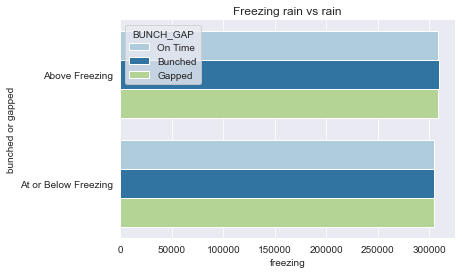

In [36]:
df = raining
sns.set_style('darkgrid')
sns.set_palette('Paired')
sns.barplot(data=df, x='TRIP_ID', y='FREEZING_NOT_FREEZING', hue='BUNCH_GAP')
plt.title('Freezing rain vs rain')
plt.xlabel('freezing')
plt.ylabel('bunched or gapped')
sns.despine()
plt.show()

In [ ]:
df = sns.load_dataset('titanic')
sns.set_style('darkgrid')
sns.set_palette('Set2')
sns.countplot(data=df, x="class", hue='sex')
plt.title('Number of passengers, by class')
plt.xlabel('Class')
plt.ylabel('# of Passengers')
sns.despine()
plt.show()

In [ ]:
df_drop.head()

Dropping nulls in dev_percent column

On Time    1350769
Gapped       86564
Bunched      70014

Dropping nulls in scheduled headway column:

On Time    1392843
Gapped       86564
Bunched      70014

On Time    1350769
Gapped       86564
Bunched      70014

Without dropping nulls:

On Time    1825137
Gapped       86564
Bunched      70014


In [ ]:
# without dropping null values from dev_percent column 

merge_df['BUNCH_GAP'].value_counts(normalize=True)

In [ ]:
below_freezing = df_drop.loc[df_drop['temp']<32]
below_freezing['BUNCH_GAP'].value_counts()

In [ ]:
below_freezing['BUNCH_GAP'].value_counts(normalize=True)

In [ ]:
above_freezing=df_drop.loc[df_drop['temp']>32]
above_freezing['BUNCH_GAP'].value_counts()

In [ ]:
above_freezing['BUNCH_GAP'].value_counts(normalize = True)

In [ ]:
above_freezing['BUNCH_GAP'].value_counts().plot(kind='bar');
plt.style.use('seaborn')

In [ ]:
below_freezing['BUNCH_GAP'].value_counts().plot(kind='bar');

In [ ]:
above_freezing['temp'].value_counts().plot(kind='hist');

In [ ]:
#above_freezing=merge_df_b.loc[merge_df_b['temp']>32]

freezing_rain = below_freezing.loc[below_freezing['precip_hrly']>0]
freezing_rain.head()

In [ ]:
not_freezing_rain = above_freezing.loc[above_freezing['precip_hrly']<1]
not_freezing_rain.head()

In [ ]:
below_freezing['precip_hrly'].value_counts()

In [ ]:
freezing_rain['BUNCH_GAP'].value_counts()

In [ ]:
freezing_rain['BUNCH_GAP'].value_counts(normalize=True)

In [ ]:
freezing_rain['BUNCH_GAP'].value_counts().plot(kind='bar')
plt.xticks(fontsize=12) 
                             

plt.xticks(fontsize = 12) 
tick_val = [0,100,200,300,400,500,600,700,800,900,1000,1100,1200,1300]
plt.yticks(tick_val)                            
plt.title('Freezing Rain',                              
         fontsize = 14,
         fontweight = 'bold');


# sns.color_palette(palette='Paired')

In [ ]:
a =sns.barplot(x=freezing_rain.BUNCH_GAP.value_counts().index, y=freezing_rain.BUNCH_GAP.value_counts(), palette='Paired')



In [ ]:
a =sns.barplot(x=not_freezing_rain.BUNCH_GAP.value_counts().index, y=not_freezing_rain.BUNCH_GAP.value_counts(), palette='Paired')

# all raining with 2 smaller dataframes with either 32 degrees and below or 32 degrees and above. 
# raining freezing vs raining not freezing. 




In [ ]:
plt.figure(figsize=(11,11))
p = sns.barplot(x='IS_SNOWING',
           y='TRIP_ID',
           hue= 'GAPPED_OR_BUNCHED',
            palette='Paired',    
           data = snow_vs_nosnow.reset_index())
for i in p.containers:
    p.bar_label(i,)
plt.xlabel('Snow Status')
plt.ylabel('% of Total')
plt.title('Snow vs. Headway Deviation')


In [ ]:
sns.pairplot(df_drop, hue='total_bill', palette='Paired')
plt.show()

In [ ]:
merge_df['temp'].plot(kind='hist')





In [ ]:
# plt.hist(df_2014['Internet_Users_Pct'], bins=8)


plt.hist(merge_df['temp'], bins=6)
plt.show()

In [ ]:

plt.plot(merge_df['temp'])
plt.show()

In [ ]:
merge_df['temp'].value_counts().plot(kind='barh')

In [ ]:
below_freezing.corr()


The Official WeGo Style Guide of Styles
Chart palette should be 'Paired' (seaborn palette code = 'Paired')
Standard font
Follow normal capitalization rules for chart labels
Make sure charts used for comparisons have uniform axiis (ie. charts dealing with percentages should be 0-100)
Order labels appropriately  (months, days, time, etc). Weekdays should be in order starting with Monday
Color Congruency (if a year or route is one color in one slide, it should be the same color in another slide)
When adding charts to slides, be sure that they don't appear to be stretched. (Shift+Click when resizing, or set size in Jupyter Notebook)
Google slide deck to add your slides here:
https://docs.google.com/presentation/d/1amjAIDhoRR63oJNMUm9oM2Uf799NaOMkCXslJ8nAex0/edit?usp=sharing (edited) 